In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import regionmask
import geopandas as gp

In [3]:
data = xr.open_dataset("../data/nsidc_iceage.1984_2020.7daily.nc")

In [4]:
iceage = data.age_of_sea_ice[0,:,:]

In [5]:
lat = data['latitude']
lon = data['longitude']

In [9]:
Arctic_shapefile = gp.read_file("../data/ArcticSeaShapefile/iho.shp")

In [10]:
Arctic_region = regionmask.from_geopandas(Arctic_shapefile)

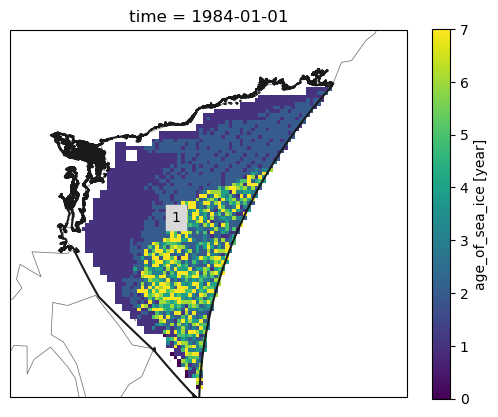

In [56]:
proj = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
ax = plt.axes(projection= proj)
Arctic_region[[1]].plot(ax=ax)

mask = Arctic_region[[1]].mask(lon,lat)
iceage_mask = iceage.where(np.logical_and(mask==1,iceage<=16))

iceage_mask.plot(ax=ax)
ax.set_extent([-160,-120,70,75],crs=ccrs.PlateCarree())
plt.show()

In [51]:
np.logical_and(iceage!=20,iceage!=1)

<xarray.DataArray 'age_of_sea_ice' (y: 722, x: 722)>
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
Coordinates:
  * x        (x) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
  * y        (y) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
    time     datetime64[ns] 1984-01-01